In [1]:
import pandas as pd


df = pd.read_excel('hw_1_data-2.xlsx')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.8,1990.5,0,0,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.2,7362.9,0,5,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,"29,06,2025",346.45,0,0,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.4,306.6,0,0,Yes


In [2]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

In [3]:
df.duplicated().sum()

np.int64(0)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
columns_for_num = ['MonthlyCharges', 'TotalCharges', 'tenure']  

for col in columns_for_num:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
df_clean = df.dropna(subset=columns_for_num)

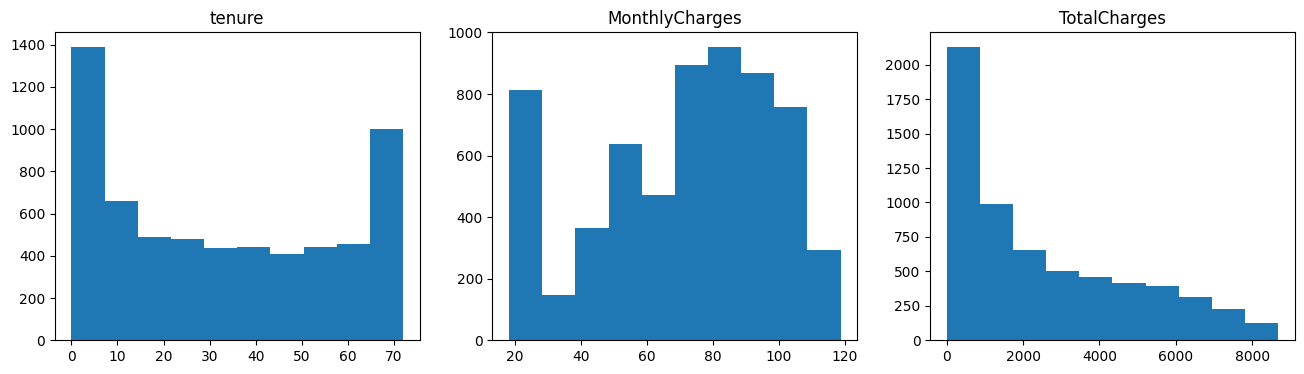

In [6]:
col_names = ['tenure', 'MonthlyCharges', 'TotalCharges'] 
fig, ax = plt.subplots(1, 3, figsize=(16, 4))    
for i in range(len(col_names)):
    ax[i].set_title(col_names[i])
    ax[i].hist(df_clean[col_names[i]])

In [7]:
import numpy as np

In [8]:

df_clean[df_clean['TotalCharges'] == 0].shape[0]

10

In [9]:
df_clean = df_clean.copy()
df_clean['ln_TotalCharges'] = np.log(df_clean['TotalCharges']+1)

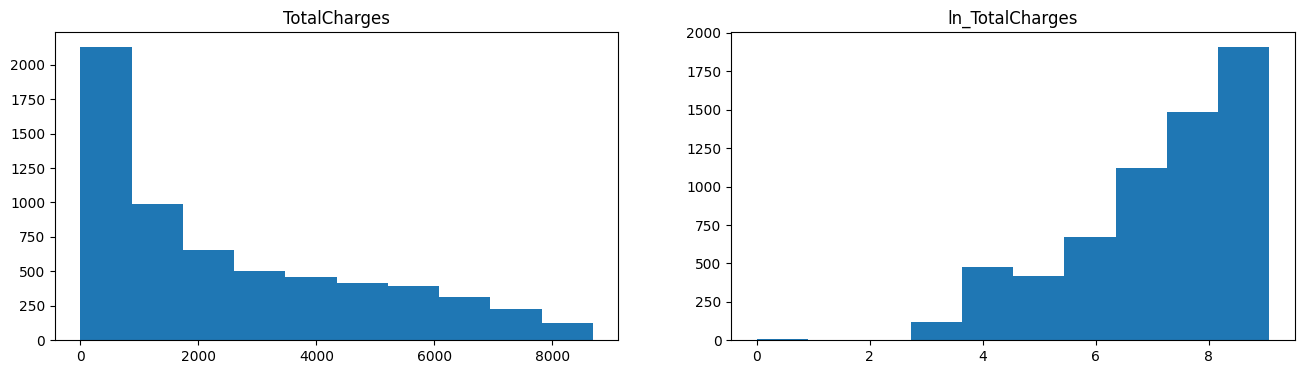

In [10]:
Total_ln = ['TotalCharges', 'ln_TotalCharges']
fig, ax = plt.subplots(1, 2, figsize=(16, 4))    
for i in range(len(Total_ln)):                       
    ax[i].set_title(Total_ln[i])
    ax[i].hist(df_clean[Total_ln[i]])

<Axes: >

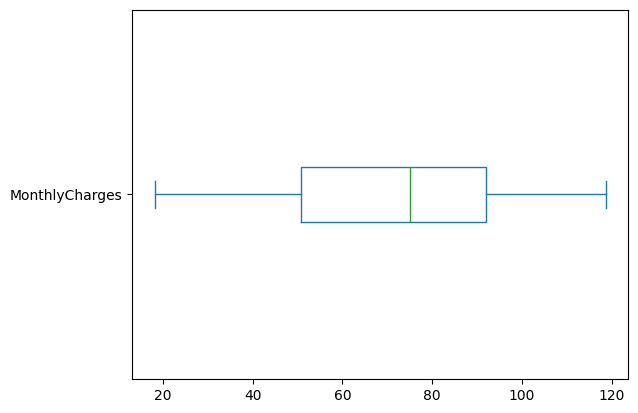

In [11]:
df_clean['MonthlyCharges'].plot(kind='box', vert=False)

<Axes: >

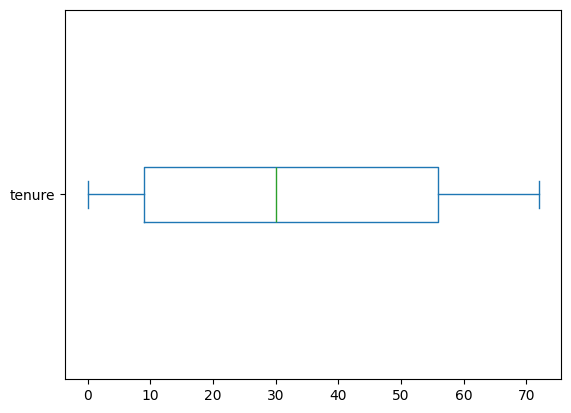

In [12]:
df_clean['tenure'].plot(kind='box', vert=False)

<Axes: >

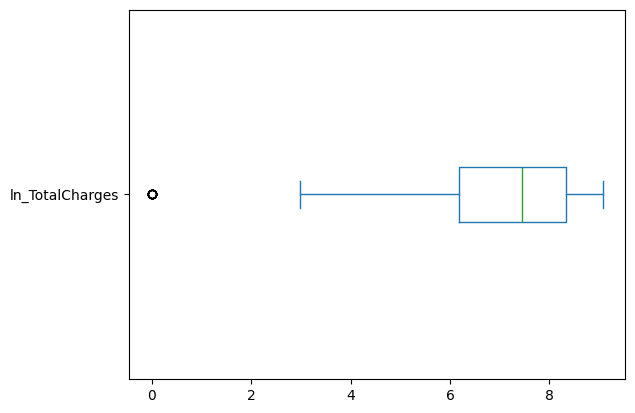

In [13]:
df_clean['ln_TotalCharges'].plot(kind='box', vert=False)

In [14]:
q1 = df_clean['ln_TotalCharges'].quantile(0.25)
q3 = df_clean['ln_TotalCharges'].quantile(0.75)
iqr = q3 - q1
left = q1 - 1.5 * iqr
right = q3 + 1.5 * iqr
df_clean = df_clean[df_clean['ln_TotalCharges'].between(left, right)]

<Axes: >

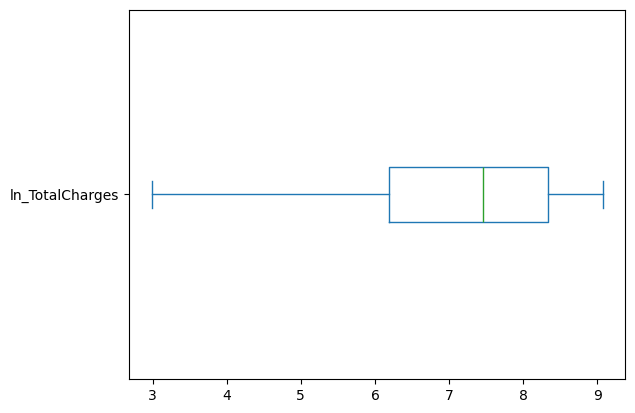

In [15]:
df_clean['ln_TotalCharges'].plot(kind='box', vert=False)

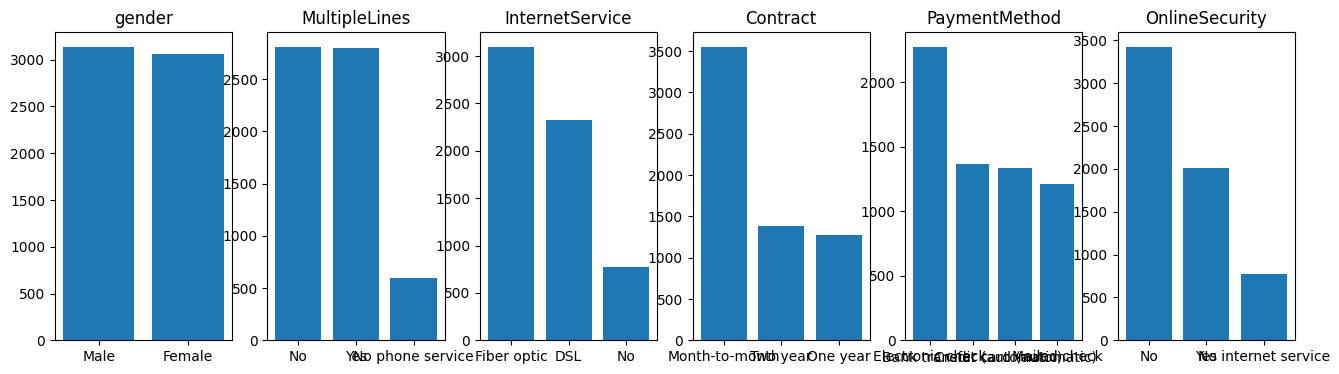

In [16]:
category = ['gender', 'MultipleLines', 'InternetService', 'Contract','PaymentMethod', 'OnlineSecurity']
fig, ax = plt.subplots(1, 6, figsize=(16, 4))
for i in range(len(category)):                
    ax[i].set_title(category[i])        
    freq = df_clean[category[i]].value_counts()
    ax[i].bar(freq.index, freq.values) # пол не влияет

<Axes: >

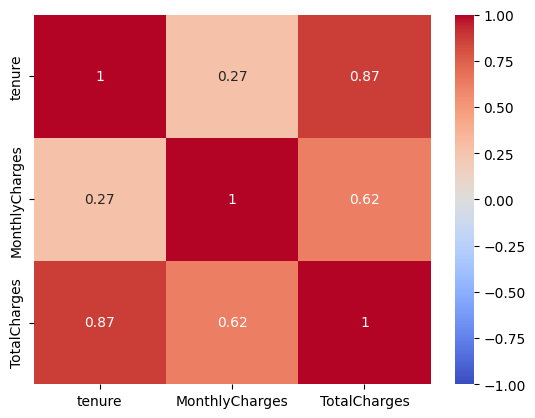

In [17]:
sns.heatmap(                     
            df_clean[col_names].corr(), 
            annot = True, 
            vmin = -1,
            vmax = 1,
            cmap="coolwarm")

In [18]:
from sklearn.preprocessing import LabelEncoder


lst = ['gender', 'Partner', 'PhoneService', 'StreamingMovies', 'PaperlessBilling', 'Churn',]
for col in lst:
  df_clean[f'{col}_encoded'] = LabelEncoder().fit_transform(df_clean[col])
df_clean.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,numAdminTickets,numTechTickets,Churn,ln_TotalCharges,gender_encoded,Partner_encoded,PhoneService_encoded,StreamingMovies_encoded,PaperlessBilling_encoded,Churn_encoded
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0,0,No,3.429137,0,1,0,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,0,0,No,7.544597,1,0,1,0,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,0,0,Yes,4.692723,1,0,1,0,1,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,0,3,No,7.518471,1,0,0,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0,0,Yes,5.028148,0,0,1,0,1,1


In [19]:
df_encoded = pd.get_dummies(df_clean, columns = ['InternetService'], dtype=int)
df_encoded.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,ln_TotalCharges,gender_encoded,Partner_encoded,PhoneService_encoded,StreamingMovies_encoded,PaperlessBilling_encoded,Churn_encoded,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,Yes,...,3.429137,0,1,0,0,1,0,1,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,...,7.544597,1,0,1,0,0,0,1,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,...,4.692723,1,0,1,0,1,1,1,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Yes,No,...,7.518471,1,0,0,0,0,0,1,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,5.028148,0,0,1,0,1,1,0,1,0


In [20]:
df_encoded = pd.get_dummies(df_clean, columns = ['OnlineSecurity'], dtype=int)
df_encoded.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineBackup,...,ln_TotalCharges,gender_encoded,Partner_encoded,PhoneService_encoded,StreamingMovies_encoded,PaperlessBilling_encoded,Churn_encoded,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,Yes,...,3.429137,0,1,0,0,1,0,1,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,No,...,7.544597,1,0,1,0,0,0,0,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,4.692723,1,0,1,0,1,1,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,No,...,7.518471,1,0,0,0,0,0,0,0,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,5.028148,0,0,1,0,1,1,1,0,0


<Axes: >

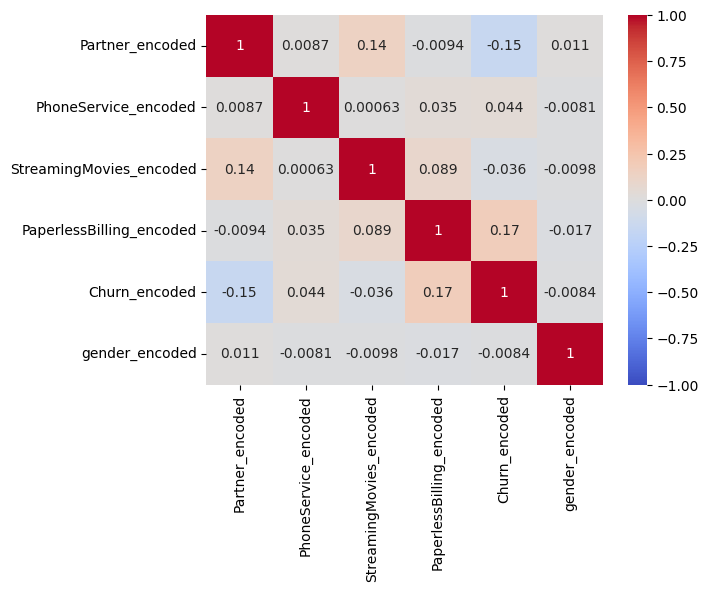

In [21]:
col_cat = ['Partner_encoded',	'PhoneService_encoded',	'StreamingMovies_encoded',	'PaperlessBilling_encoded',	'Churn_encoded',	'gender_encoded']
sns.heatmap(                                    
            df_encoded[col_cat].corr('spearman'),  
            annot = True,       
            vmin = -1,                       
            vmax = 1,             
            cmap="coolwarm") # наличие партнера не сильно влияет, слабая корреляция

<Axes: xlabel='InternetService'>

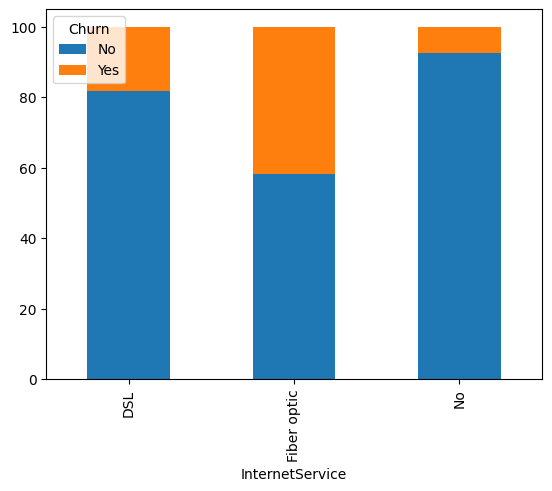

In [22]:
pt_1 = df_encoded.pivot_table(index='InternetService', columns='Churn', values='customerID', aggfunc='count')
pt_1.apply(lambda x: x / x.sum() * 100, axis=1).plot(kind='bar', stacked=True)

<Axes: xlabel='MultipleLines'>

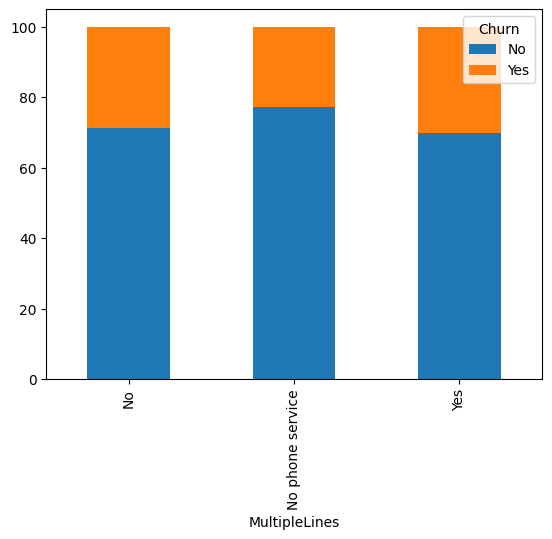

In [23]:
pt_2 = df_encoded.pivot_table(index='MultipleLines', columns='Churn', values='customerID', aggfunc='count')
pt_2.apply(lambda x: x / x.sum() * 100, axis=1).plot(kind='bar', stacked=True)

<Axes: xlabel='Contract'>

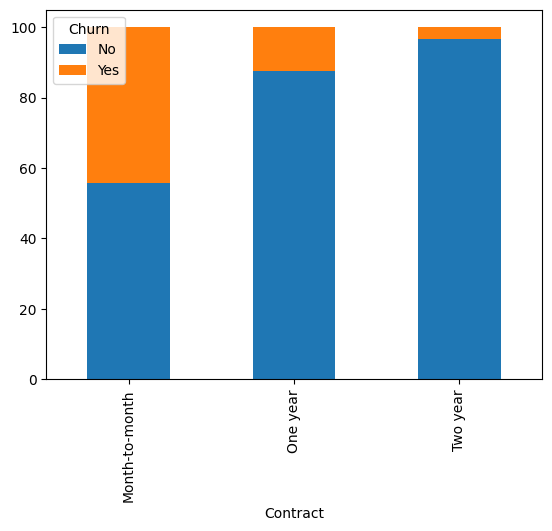

In [24]:
pt_3 = df_encoded.pivot_table(index='Contract', columns='Churn', values='customerID', aggfunc='count')
pt_3.apply(lambda x: x / x.sum() * 100, axis=1).plot(kind='bar', stacked=True)

<Axes: xlabel='PaymentMethod'>

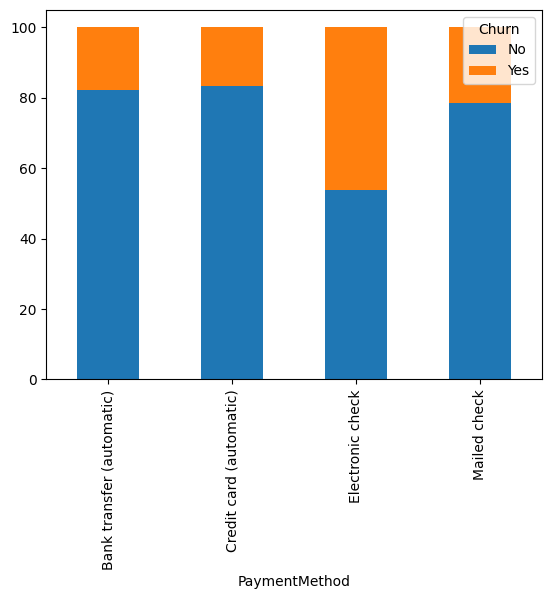

In [25]:
pt_4 = df_encoded.pivot_table(index='PaymentMethod', columns='Churn', values='customerID', aggfunc='count')
pt_4.apply(lambda x: x / x.sum() * 100, axis=1).plot(kind='bar', stacked=True)

<Axes: xlabel='SeniorCitizen'>

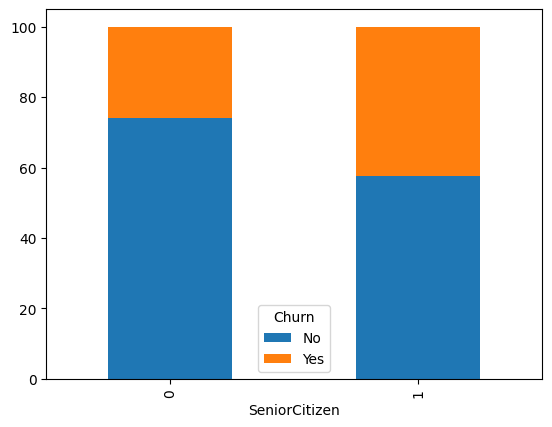

In [26]:
pt_5 = df_encoded.pivot_table(index='SeniorCitizen', columns='Churn', values='customerID', aggfunc='count')
pt_5.apply(lambda x: x / x.sum() * 100, axis=1).plot(kind='bar', stacked=True) # пенсионеры оттекают быстрее, да

<Axes: xlabel='Dependents'>

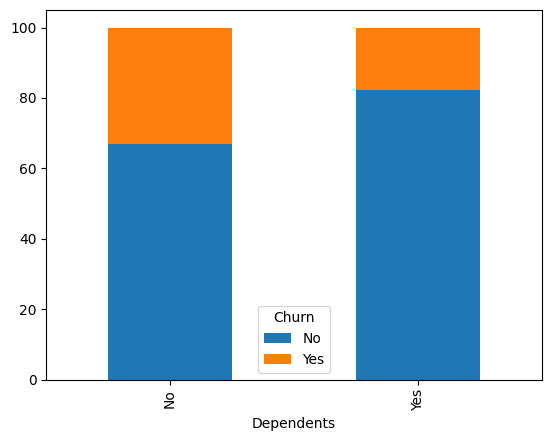

In [27]:
pt_6 = df_encoded.pivot_table(index='Dependents', columns='Churn', values='customerID', aggfunc='count')
pt_6.apply(lambda x: x / x.sum() * 100, axis=1).plot(kind='bar', stacked=True) # подтверждается

In [28]:
calls = pd.read_excel('hw_1_data_part2-2.xlsx')
calls

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,TimeSec,TimeMin,TimeTotalSec,AvgTalkDurMin,AvgTalkDurSec,AvgTalkDurTotalSecs,customerID
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0,12,9,552,2,23,27,3668-QPYBK
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0,12,9,552,4,2,10,9237-HQITU
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0,47,9,587,2,11,15,9305-CDSKC
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0,47,9,587,0,37,37,7892-POOKP
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0,0,10,600,1,0,2,0280-XJGEX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ID4996,Jim,2021-03-31,16:37:55,Payment related,Y,Y,22.0,00:05:40,1.0,37,16,997,5,40,50,5453-YBTWV
4996,ID4997,Diane,2021-03-31,16:45:07,Payment related,Y,Y,100.0,00:03:16,3.0,45,16,1005,3,16,22,5453-AXEPF
4997,ID4998,Diane,2021-03-31,16:53:46,Payment related,Y,Y,84.0,00:01:49,4.0,53,16,1013,1,49,51,5451-YHYPW
4998,ID4999,Jim,2021-03-31,17:02:24,Streaming,Y,Y,98.0,00:00:58,5.0,2,17,1022,0,58,58,5451-MHQOF


In [29]:
calls.isna().sum()

Call Id                         0
Agent                           0
Date                            0
Time                            0
Topic                           0
Answered (Y/N)                  0
Resolved                        0
Speed of answer in seconds    946
AvgTalkDuration               946
Satisfaction rating           946
TimeSec                         0
TimeMin                         0
TimeTotalSec                    0
AvgTalkDurMin                   0
AvgTalkDurSec                   0
AvgTalkDurTotalSecs             0
customerID                      0
dtype: int64

In [30]:
calls.duplicated().sum()

np.int64(0)

In [31]:
calls['Satisfaction rating'].mode()

0    3.0
Name: Satisfaction rating, dtype: float64

In [32]:
median_speed = calls.groupby('Agent')['Speed of answer in seconds'].transform('median')
calls['Speed of answer in seconds'] = calls['Speed of answer in seconds'].fillna(median_speed)

In [33]:
mode = calls['Satisfaction rating'].mode()[0]
calls['Satisfaction rating'] = calls['Satisfaction rating'].fillna(mode)
calls.isna().sum()

Call Id                         0
Agent                           0
Date                            0
Time                            0
Topic                           0
Answered (Y/N)                  0
Resolved                        0
Speed of answer in seconds      0
AvgTalkDuration               946
Satisfaction rating             0
TimeSec                         0
TimeMin                         0
TimeTotalSec                    0
AvgTalkDurMin                   0
AvgTalkDurSec                   0
AvgTalkDurTotalSecs             0
customerID                      0
dtype: int64

In [34]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Call Id                     5000 non-null   object        
 1   Agent                       5000 non-null   object        
 2   Date                        5000 non-null   datetime64[ns]
 3   Time                        5000 non-null   object        
 4   Topic                       5000 non-null   object        
 5   Answered (Y/N)              5000 non-null   object        
 6   Resolved                    5000 non-null   object        
 7   Speed of answer in seconds  5000 non-null   float64       
 8   AvgTalkDuration             4054 non-null   object        
 9   Satisfaction rating         5000 non-null   float64       
 10  TimeSec                     5000 non-null   int64         
 11  TimeMin                     5000 non-null   int64       

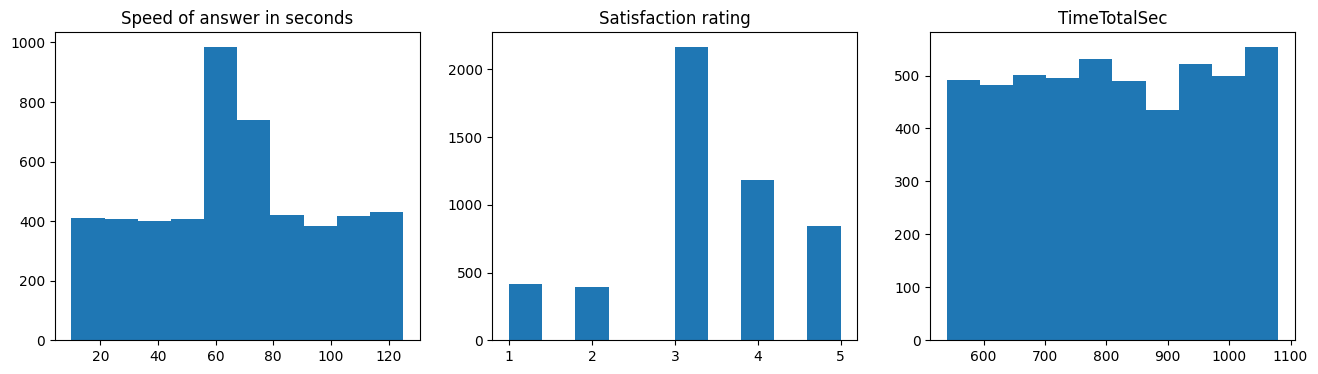

In [35]:
calls_number = ['Speed of answer in seconds', 'Satisfaction rating', 'TimeTotalSec'] 
fig, ax = plt.subplots(1, 3, figsize=(16, 4))    
for i in range(len(calls_number)):
    ax[i].set_title(calls_number[i])
    ax[i].hist(calls[calls_number[i]])

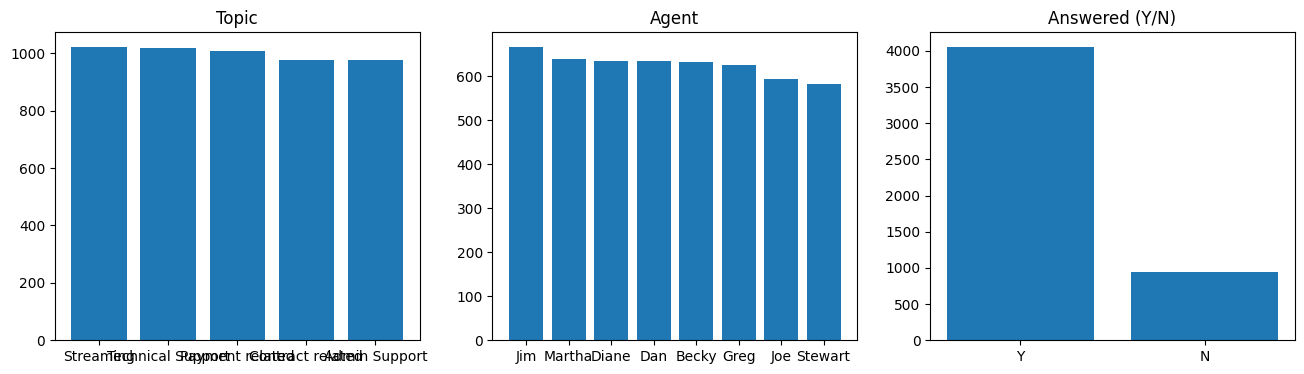

In [36]:
category_calls = ['Topic', 'Agent', 'Answered (Y/N)']
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
for i in range(len(category_calls)):                
    ax[i].set_title(category_calls[i])        
    freq = calls[category_calls[i]].value_counts()
    ax[i].bar(freq.index, freq.values)
# Тема не влияет
# Какой агент тоже
# В основном ответ был

In [37]:
un_call = (calls['Call Id'].nunique()/calls['customerID'].nunique())
un_call

1.218026796589525

<Axes: xlabel='calls_count'>

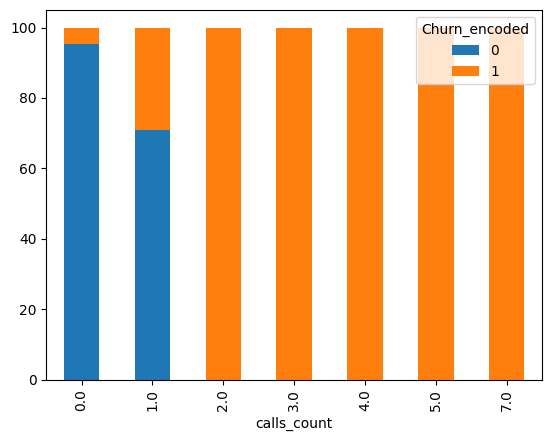

In [38]:
calls_count = calls['customerID'].value_counts().reset_index()
calls_count.columns = ['customerID', 'calls_count']
calls_count = calls_count.rename(columns={'count': 'call_count'})

df_merged = df_encoded.merge(calls_count, on='customerID', how='left')
df_merged['calls_count'] = df_merged['calls_count'].fillna(0)

pt_7 = df_merged.pivot_table(index='calls_count', columns='Churn_encoded', values='customerID', aggfunc='count')
pt_7.apply(lambda x: x / x.sum() * 100, axis=1).plot(kind='bar', stacked=True) # Да, в основном оттекали те, кто звонили больше 1 раза

In [39]:
calls.dtypes

Call Id                               object
Agent                                 object
Date                          datetime64[ns]
Time                                  object
Topic                                 object
Answered (Y/N)                        object
Resolved                              object
Speed of answer in seconds           float64
AvgTalkDuration                       object
Satisfaction rating                  float64
TimeSec                                int64
TimeMin                                int64
TimeTotalSec                           int64
AvgTalkDurMin                          int64
AvgTalkDurSec                          int64
AvgTalkDurTotalSecs                    int64
customerID                            object
dtype: object

<Axes: xlabel='Satisfaction rating'>

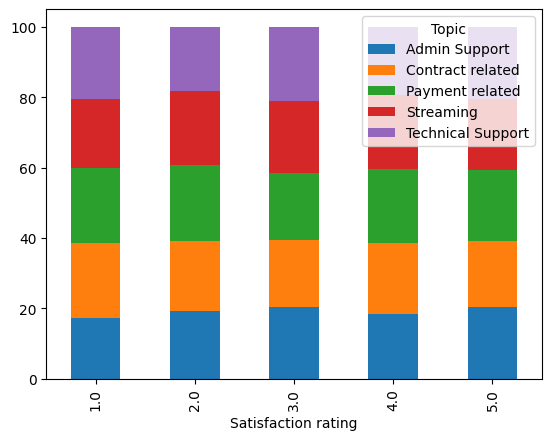

In [40]:
pt_8 = calls.pivot_table(index='Satisfaction rating', columns='Topic', values='Call Id', aggfunc='count')
pt_8.apply(lambda x: x / x.sum() * 100, axis=1).plot(kind='bar', stacked=True)

<Axes: xlabel='Satisfaction rating'>

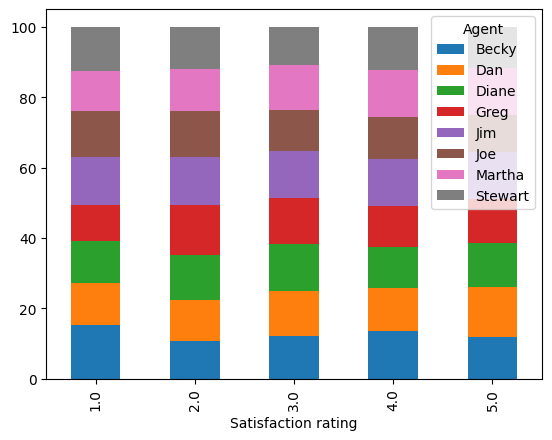

In [41]:
pt_9 = calls.pivot_table(index='Satisfaction rating', columns='Agent', values='Call Id', aggfunc='count')
pt_9.apply(lambda x: x / x.sum() * 100, axis=1).plot(kind='bar', stacked=True)

In [42]:
calls_merged = calls.merge(df_encoded[['customerID', 'Churn_encoded']], on='customerID', how='left')

<Axes: xlabel='Topic'>

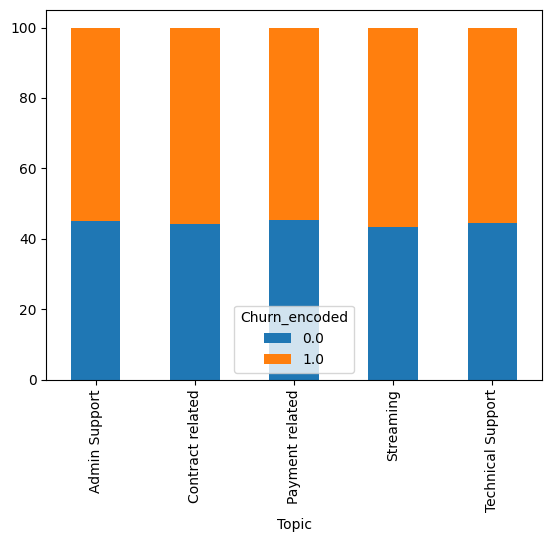

In [43]:
pt_topic = calls_merged.pivot_table(index='Topic', columns='Churn_encoded', values='customerID', aggfunc='count')

pt_topic.apply(lambda x: x / x.sum() * 100, axis=1).plot(kind='bar', stacked=True)

In [44]:
# Тест Д'Агостино (работает для n > 50) на пожилых людей, которые чаще уходят/остаются
from scipy.stats import normaltest

stat_active, p_active = normaltest(df_encoded[df_encoded['Churn_encoded'] == 0]["SeniorCitizen"])  # активные
stat_churned, p_churned = normaltest(df_encoded[df_encoded['Churn_encoded'] == 1]["SeniorCitizen"]) # ушедшие 
p_active, p_churned # распределение ненормальное так как p-value < 0,05

(np.float64(0.0), np.float64(2.052079718724896e-87))

In [45]:
from statsmodels.stats.proportion import proportions_ztest


count_senior = len(df_encoded[
    (df_encoded['SeniorCitizen'] == 1) & (df_encoded['Churn'] == 'Yes')
])
count_no_senior = len(df_encoded[
    (df_encoded['SeniorCitizen'] == 0) & (df_encoded['Churn'] == 'Yes')
])

n_senior = len(df_encoded[df_encoded['SeniorCitizen'] == 1])
n_non_senior = len(df_encoded[df_encoded['SeniorCitizen'] == 0])

stat, p_value = proportions_ztest([count_senior, count_no_senior],
                                  [n_senior, n_non_senior])

print(f'Z = {stat:.3f}, p-value = {p_value:.5f}')
print(f'p_value = {p_value:.6f}, Отклоняем H0: {p_value < 0.05}')

Z = 11.007, p-value = 0.00000
p_value = 0.000000, Отклоняем H0: True


In [46]:
from statsmodels.stats.proportion import proportions_ztest


family_churn_count = len(df_encoded[
    (df_encoded['Partner'] == 'Yes') & (df_encoded['Churn'] == 'Yes')
])
single_churn_count = len(df_encoded[
    (df_encoded['Partner'] == 'No') & (df_encoded['Churn'] == 'Yes')
])

n_family = len(df_encoded[df_encoded['Partner'] == 'Yes'])
n_single = len(df_encoded[df_encoded['Partner'] == 'No'])

stat, p_value = proportions_ztest(
    [family_churn_count, single_churn_count],
    [n_family, n_single],
    alternative='smaller' )

print(f'Z = {stat:.3f}, p-value = {p_value:.5f}')
print(f'p_value = {p_value:.6f}, Отклоняем H0: {p_value < 0.05}')

Z = -11.795, p-value = 0.00000
p_value = 0.000000, Отклоняем H0: True


In [47]:
n_single, n_family

(3193, 3004)

In [ ]:
from scipy.stats import mannwhitneyu


stat, p_value = mannwhitneyu(
    df_encoded[df_encoded['Churn_encoded'] == 0]['tenure'],  # активные
    df_encoded[df_encoded['Churn_encoded'] == 1]['tenure'],  # ушедшие  
    alternative='greater')

print(f'p_value = {p_value:.6f}, Отклоняем H0: {p_value < 0.05}')

p_value = 0.000000, Отклоняем H0: True


In [49]:
# тип интернета влияет на отток
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(df_encoded['InternetService'], df_encoded['Churn_encoded'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'p_value = {p_value:.6f}, Отклоняем H0: {p_value < 0.05}')

p_value = 0.000000, Отклоняем H0: True


<Axes: xlabel='gender'>

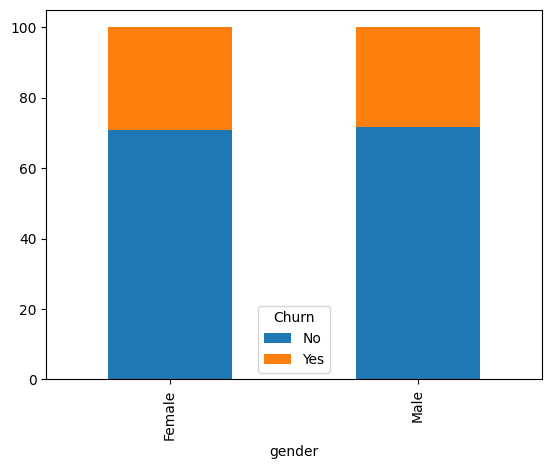

In [50]:
pt_10 = df_encoded.pivot_table(index='gender', columns='Churn', values='customerID', aggfunc='count')
pt_10.apply(lambda x: x / x.sum() * 100, axis=1).plot(kind='bar', stacked=True)

<Axes: xlabel='Agent'>

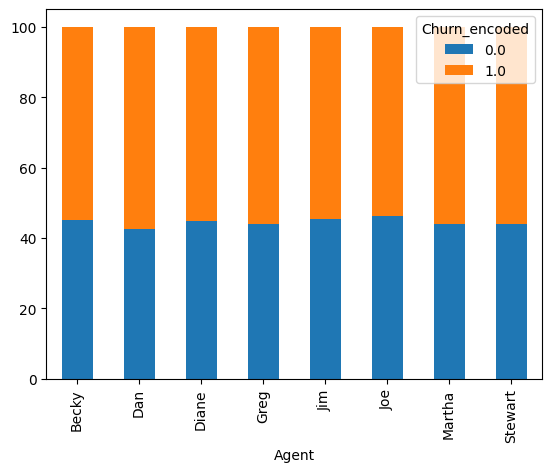

In [51]:
pt_Agent = calls_merged.pivot_table(index='Agent', columns='Churn_encoded', values='customerID', aggfunc='count')
pt_Agent.apply(lambda x: x / x.sum() * 100, axis=1).plot(kind='bar', stacked=True)

<Axes: xlabel='TechSupport'>

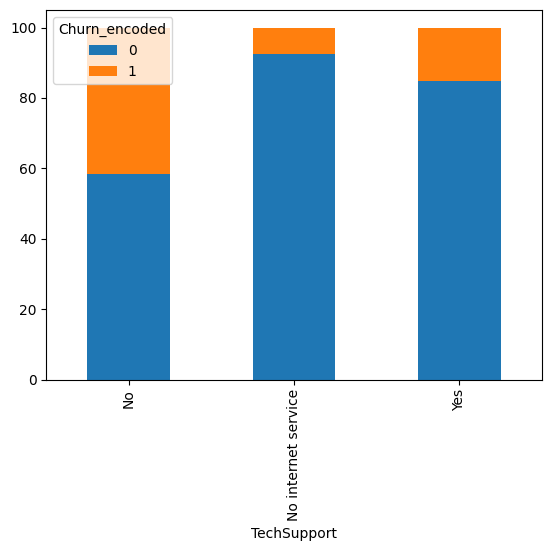

In [52]:
pt_online_security = df_encoded.pivot_table(index='TechSupport', columns='Churn_encoded', values='customerID', aggfunc='count' )
pt_online_security.apply(lambda x: x / x.sum() * 100, axis=1).plot(kind='bar', stacked=True)

In [53]:
df_download = pd.get_dummies(df_merged, columns = ['InternetService'], dtype=int)
df_download = pd.get_dummies(df_download, columns = ['DeviceProtection'], dtype=int)
df_download = pd.get_dummies(df_download, columns = ['TechSupport'], dtype=int, )
df_download = pd.get_dummies(df_download, columns = ['PaymentMethod'], dtype=int, )
df_download.to_csv('df_clean_main.csv', index=False)

In [54]:
df_download

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineBackup,StreamingTV,...,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,Yes,No,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,No,No,...,0,0,1,1,0,0,0,0,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,No,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,No,No,...,0,0,1,0,0,1,1,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6192,2569-WGERO,Female,0,No,No,72,Yes,No,No internet service,No internet service,...,0,1,0,0,1,0,1,0,0,0
6193,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,...,0,0,1,0,0,1,0,0,0,1
6194,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Yes,Yes,...,0,0,1,1,0,0,0,1,0,0
6195,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,No,No,...,1,0,0,1,0,0,0,0,0,1
